# Exploratory data analysis (EDA): feature engineering and feature selection

**Author:** Y.X. Wu


In [ ]:
from utils.FeatureCalculator import FeatureCalculator
import numpy as np
import pandas as pd
import os

# display the current working directory
display("Current working directory: {0}".format(os.getcwd()))

data_path = '../Dataset_Cleaned/'
display(os.path.isfile(data_path+'LiteratureDataset_Corrosion_YW_v3.xlsx'))

## Feature engineering

### Feature Calculation for Alloy Components

Prepares and processes data about alloy compositions, specifically it creates a `FeatureCalculator` object from the defined compositions, then calculates and prints the corresponding alloy features.


In [ ]:
# Define a list of component elements and their corresponding fractions
compo_elem = ["Ni", "Cr", "Mo", "Ti", "Fe"]
ele_frac = np.array([43.8, 38.3, 2.44, 1.04, 0])

# Create a dictionary mapping each element to its corresponding fraction,
ele_frac_dict = {elem: frac for elem, frac in zip(compo_elem, ele_frac)}

# Prepare data in the format required for FeatureCalculator - a list of tuples,
# where each tuple contains a list of elements and their corresponding fractions
compositions = [(list(ele_frac_dict.keys()), list(ele_frac_dict.values()))]

print(compositions)

# Create a FeatureCalculator object with the prepared compositions
calculator = FeatureCalculator(compositions)

# Calculate the features using the FeatureCalculator object
features = calculator.calculate_features()


feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]
# tabulate the features the feature under feature_names
df = pd.DataFrame(features, columns=feature_names)
display(df)

### Data Loading, Feature Calculation, and Extraction

Reads various datasets from Excel files, calculates specific features for each material composition in these datasets using a custom `FeatureCalculator` class, extracts relevant data from the corrosion and hardness datasets, and displays the first rows of the extracted data.


In [ ]:
import pandas as pd
from utils.FeatureCalculator import FeatureCalculator

# Initialization of the constants and the data to be loaded
feature_names = ["a", "delta_a", "Tm", "sigma_Tm", "Hmix", "sigma_Hmix", "ideal_S",
                 "elec_nega", "sigma_elec_nega", "VEC", "sigma_VEC", "bulk_modulus", "sigma_bulk_modulus"]

# Lists of filenames, elements for each file, and the header rows for the data in each file
data_file_names = ["LiteratureDataset_Corrosion_YW_v3.xlsx",
                   "LiteratureDataset_Hardness_YW_v3.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_at_pct.xlsx",
                   "MultiTaskModel_NiCrCoVFe_KW99_wt_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_at_pct.xlsx",
                   "MultiTaskModel_NiCrMoTiFe_KW131_wt_pct.xlsx"]
element_columns = [['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y'],
                   ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                    'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Co', 'V', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe'],
                   ['Ni', 'Cr', 'Mo', 'Ti', 'Fe']]

df_header_list = [2, 2, 0, 0, 0, 0, 0, 0]
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
                                 'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
features_dfs = []

# Processing each data file along with the corresponding elements
for i in range(len(data_file_names)):
    # Load and preprocess data from each excel file
    data_df = pd.read_excel(
        data_path + data_file_names[i], header=df_header_list[i])
    # print(data_df.columns)
    element_fractions = data_df[element_columns[i]].fillna(0)

    # Calculate features for each composition
    compositions = [(element_columns[i], element_fraction)
                    for element_fraction in element_fractions.values]
    feature_calculator = FeatureCalculator(compositions)
    calculated_features = feature_calculator.calculate_features()

    # Store the calculated features in a DataFrame
    features_df = pd.DataFrame(calculated_features, columns=feature_names)
    features_dfs.append(features_df)

    # Extract and store specific data and features for the corrosion and hardness datasets
    if i == 0:  # Corrosion dataset
        df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output = element_fractions, data_df[[
            'TestTemperature_C', 'ChlorideIonConcentration', 'pH', 'ScanRate_mVs']], features_df, data_df[['AvgPittingPotential_mV']]

        # now I want to make df_C_compo have the same columns as df_compo
        df_C_compo = pd.concat([df_C_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_C_compo.head(1))

    if i == 1:  # Hardness dataset
        df_H_compo, df_H_specific_features, df_H_output = element_fractions, features_df, data_df[[
            'converted HV']]
        df_H_compo = pd.concat([df_H_compo, df_compo],
                               axis=0, ignore_index=True).fillna(0)
        display(df_H_compo.head(1))


# Display the first row of the specific data, features, and output for the corrosion and hardness datasets
display(df_C_compo.head(1), df_C_specific_testing.head(1),
        df_C_specific_features.head(1), df_C_output.head(1))
display(df_H_compo.head(1), df_H_specific_features.head(1), df_H_output.head(1))

### Visualizing Correlation Matrix and Correlation with the Target Variable

Generates two visuals: a heatmap showing the correlation between all features in the data set, and a bar chart indicating the correlation of each feature with the target variable, 'AvgPittingPotential_mV'. These visuals help in identifying the relationships between different features, and how each one impacts the target variable.


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Hmix,sigma_Hmix,ideal_S,elec_nega,sigma_elec_nega,VEC,sigma_VEC,bulk_modulus,sigma_bulk_modulus,AvgPittingPotential_mV
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,-29725.004,1.441756e+06,-370.81335,180.5656,1787.599615,779.48,7716.860233,1.678989e+13,166219.942589,287.0


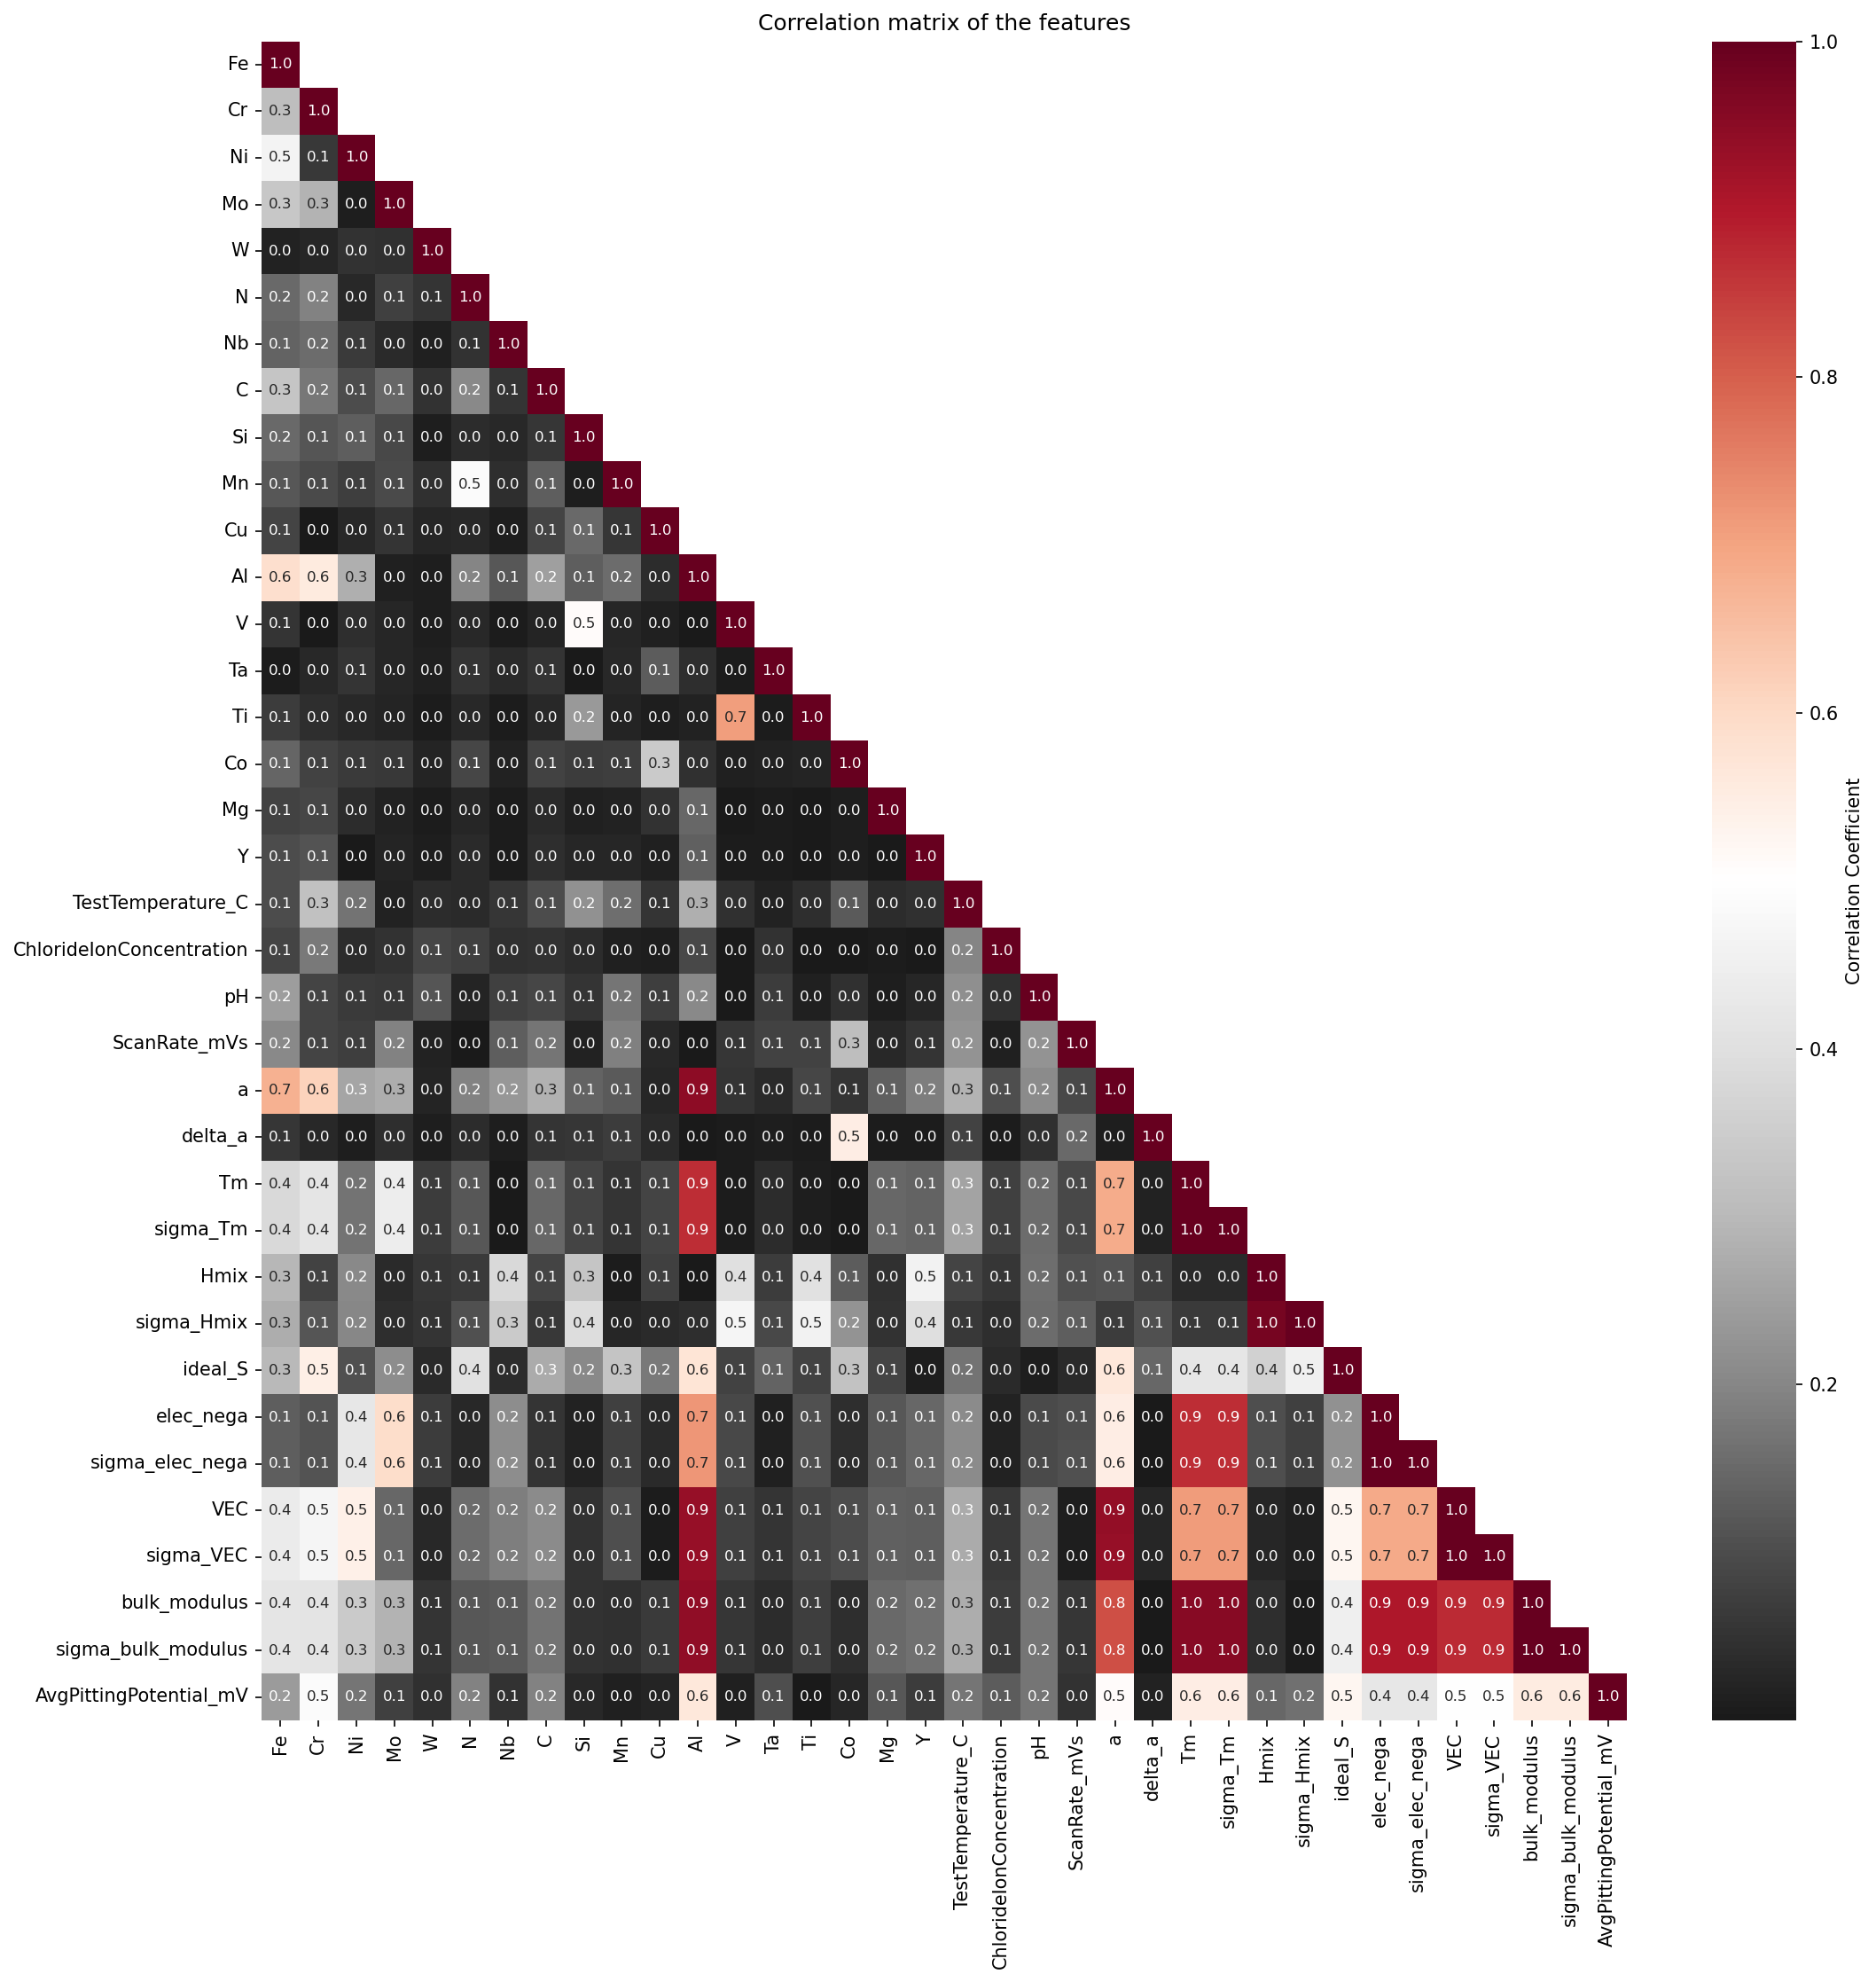

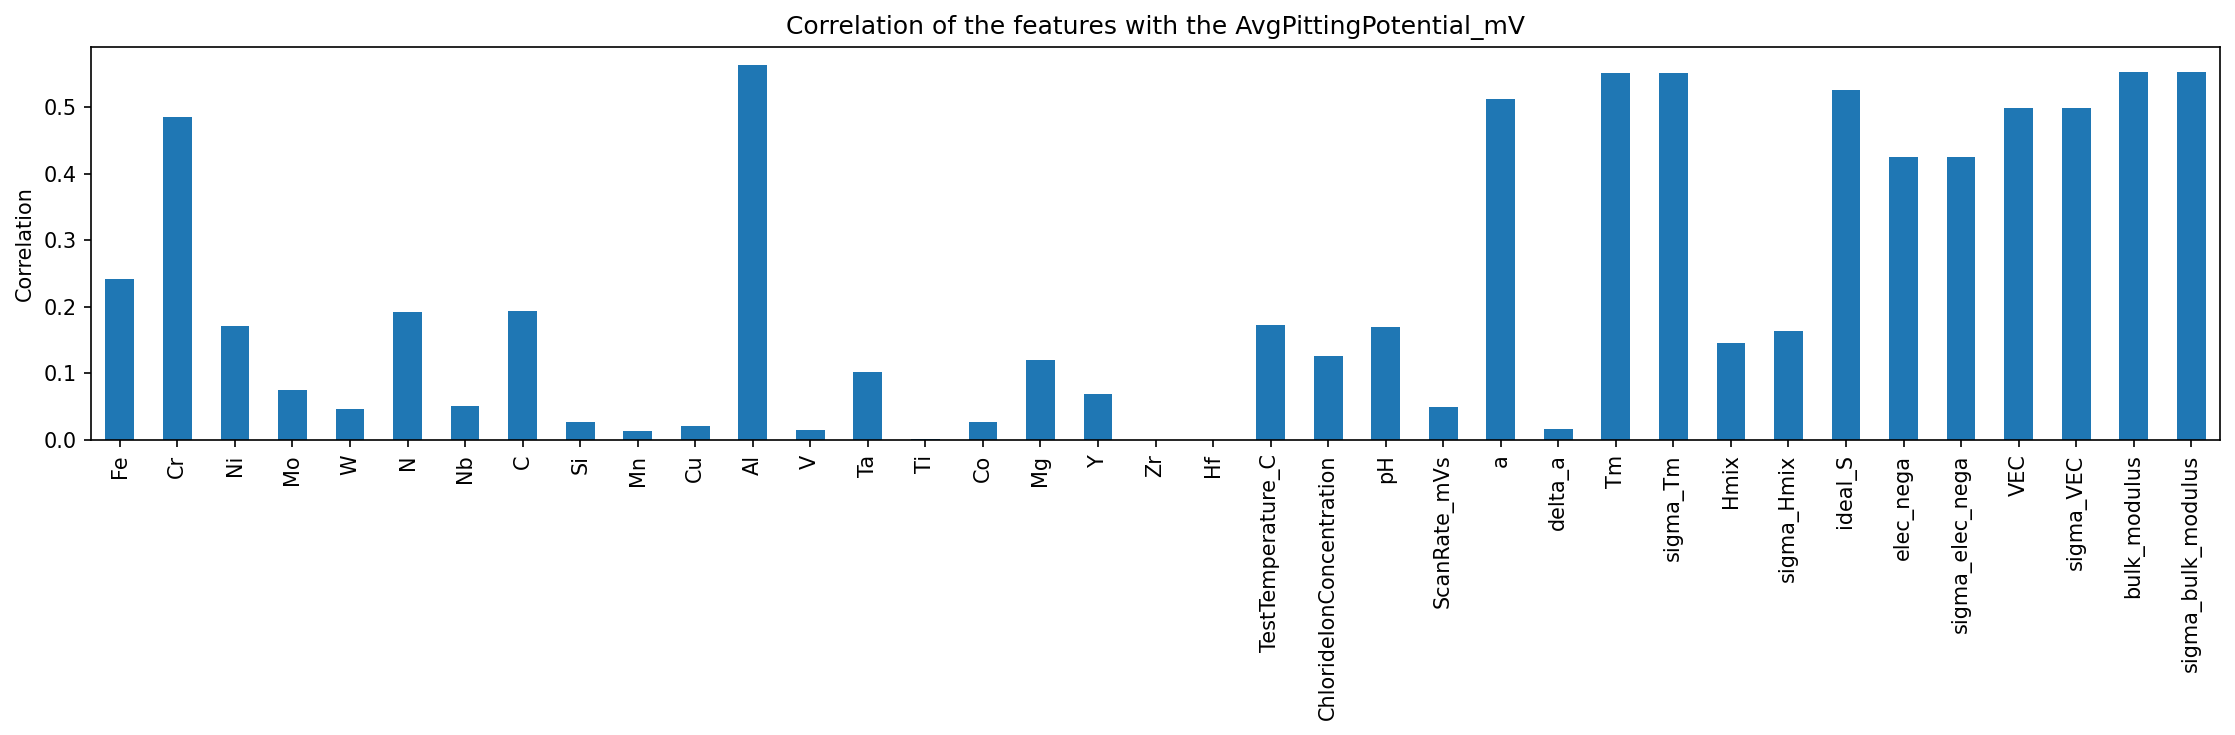

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate DataFrames
df_C = pd.concat([df_C_compo, df_C_specific_testing,
                 df_C_specific_features, df_C_output], axis=1)
display(df_C.head(1))

# Compute absolute correlation matrix
corr_matrix_C = df_C.corr().abs()

# Remove NaN columns and rows
corr_matrix_C = corr_matrix_C.loc[:, ~corr_matrix_C.isna().all(axis=0)]
corr_matrix_C = corr_matrix_C.loc[~corr_matrix_C.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_C, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)
sns.heatmap(corr_matrix_C, mask = mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})
plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_C.drop('AvgPittingPotential_mV', axis=1).apply(lambda x: x.corr(
    df_C['AvgPittingPotential_mV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the AvgPittingPotential_mV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Concatenate DataFrames
df_H = pd.concat([df_H_compo, df_H_specific_features, df_H_output], axis=1)

# Compute absolute correlation matrix
corr_matrix_H = df_H.corr().abs()

# Remove NaN columns and rows
corr_matrix_H = corr_matrix_H.loc[:, ~corr_matrix_H.isna().all(axis=0)]
corr_matrix_H = corr_matrix_H.loc[~corr_matrix_H.isna().all(axis=1), :]

# Create a mask with True in all the cells. We'll only set the diagonal to False in the next step.
mask = np.triu(np.ones_like(corr_matrix_H, dtype=bool))

# Set the diagonal to False (these are the cells we want to keep)
np.fill_diagonal(mask, False)

# Plot correlation heatmap
plt.figure(figsize=(15, 15), dpi=150)

# Use the mask in the heatmap
sns.heatmap(corr_matrix_H, mask=mask, annot=True, fmt=".1f", cmap='RdGy_r',
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={"size": 8})

plt.title("Correlation matrix of the features")
plt.tight_layout()
plt.show()

# Compute and plot correlations with the target variable
plt.figure(figsize=(15, 5), dpi=150)
df_H.drop('converted HV', axis=1).apply(lambda x: x.corr(
    df_H['converted HV'])).abs().plot(kind='bar')
plt.title("Correlation of the features with the converted HV")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()


## Feature selection

### Data Normalization

performs MinMax scaling on multiple datasets to prepare them as inputs for a Neural Network, concatenates certain scaled datasets for model training


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# Prepare data for NN
dfs = [df_H_compo, df_H_specific_features, df_H_output,
       df_C_compo, df_C_specific_testing, df_C_specific_features, df_C_output]

# Convert DataFrames to numpy arrays
inputs_outputs = [np.asarray(df.values) for df in dfs]

# Define each variable
X1, Y1, H1, X2, Z2, W2, C2 = inputs_outputs

# Initialize MinMaxScalers for each data set
scalers = {
    "compo": MinMaxScaler(),
    "H_specific_features": MinMaxScaler(),
    "H_output": MinMaxScaler(),
    "C_specific_testing": MinMaxScaler(),
    "C_specific_features": MinMaxScaler(),
    "C_output": MinMaxScaler()
}

# Fit scalers to appropriate data
scalers["compo"].fit(np.concatenate((X1, X2)))
scalers["H_specific_features"].fit(Y1)
scalers["H_output"].fit(H1.reshape((-1, 1)))
scalers["C_specific_testing"].fit(Z2)
scalers["C_specific_features"].fit(W2)
scalers["C_output"].fit(C2.reshape((-1, 1)))

# Apply transformations
X1_norm = scalers["compo"].transform(X1)
Y1_norm = scalers["H_specific_features"].transform(Y1)
H1_norm = scalers["H_output"].transform(H1.reshape((-1, 1)))

X2_norm = scalers["compo"].transform(X2)
Z2_norm = scalers["C_specific_testing"].transform(Z2)
W2_norm = scalers["C_specific_features"].transform(W2)
C2_norm = scalers["C_output"].transform(C2.reshape((-1, 1)))

# Prepare final input data for model training
# let's not use the specific feature data for now
X_H_norm = np.concatenate((X1_norm, Y1_norm), axis=1)
# let's not use the specific feature data for now
X_C_norm = np.concatenate((X2_norm, Z2_norm, W2_norm), axis=1)

# Plot distribution of target variables
plt.figure(figsize=(15, 5), dpi=150)
plt.subplot(1, 2, 1)
plt.hist(W2_norm[:, 2], bins=50)  # Distribution of one of the features

plt.subplot(1, 2, 2)
plt.hist(C2_norm, bins=50)  # Distribution of target variable
plt.show()

### Building and Evaluating Random Forest Regression Models

trains and evaluates a Random Forest Regression model using 6-fold cross-validation on two sets of normalized data ('H' and 'C'), outputting the R^2 scores for each fold and their means.


In [142]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

kf = KFold(n_splits=6, random_state=0, shuffle=True)


def train_and_evaluate(X, y, model_name):
    models, scores = [], []
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        model = RandomForestRegressor(random_state=0,
                                      n_estimators=300,
                                      max_features=20,
                                      max_depth=10,
                                      min_samples_split=2,
                                      min_samples_leaf=4,
                                      bootstrap=True)
        model.fit(X_train, y_train)
        models.append(model)
        scores.append(r2_score(y_test, model.predict(X_test)))

    print(f"{model_name} R^2 scores: {scores}, Mean: {np.mean(scores)}")
    return models


models_H = train_and_evaluate(X_H_norm, H1_norm, 'H')
models_C = train_and_evaluate(X_C_norm, C2_norm, 'C')

H R^2 scores: [0.6687154322820188, 0.6244785379338973, 0.6175409308868303, 0.6586823429404731, 0.6958344006647422, 0.7021517684977969], Mean: 0.6612339022009598
C R^2 scores: [0.679338829124225, 0.7951442671959619, 0.6995385385462471, 0.7069496630714026, 0.6877350183269326, 0.6690882780920784], Mean: 0.7062990990594745


In [143]:
print(models_H)

[RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0), RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0), RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0), RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0), RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0), RandomForestRegressor(max_depth=10, max_features=20, min_samples_leaf=4,
                      n_estimators=300, random_state=0)]


### Random Forest Hyperparameter Tuning

performs hyperparameter tuning and training of Random Forest Regressor models using K-fold cross-validation, evaluates model performance with R^2 scores, and calculates permutation feature importance for two target variables ('H' and 'C') with the same input features.

for the small dataset and I will only split into train and test data based on cross-validation: model score + feature importance are evaluated based on the test data.

be careful with overfitting: comparing the model score of the training data and the test data


In [147]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# Set up the k-fold cross-validation
kf = KFold(n_splits=6, random_state=0, shuffle=True)

# Define a function to create, train, and evaluate a Random Forest model


def hyperevaluate_train_model(X, y, model_name):
    (models, scores_train, scores_test, 
     permu_importances_train, permu_importances_test) = [], [], [], [], []

    param_distributions = {
        'n_estimators': [50, 100, 150], # less trees to reduce overfitting
        'max_features': [1, 'log2', 'sqrt'], 
        'max_depth': [4, 6, 8], # smaller to reduce overfitting
        'min_samples_split': [5, 10, 15], # larger to reduce overfitting 
        'min_samples_leaf': [6, 8, 10], # larger to reduce overfitting
        # 'bootstrap': [True, False]
    }

    rf = RandomForestRegressor(random_state=0)
    random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                       n_iter=100, cv=kf, scoring='r2', verbose=0, random_state=0, n_jobs=-1)
    # the model uses the KFold to estimate the average r2 score by testing dataset
    random_search.fit(X, y.ravel())

    print(f"Best parameters for {model_name}:", random_search.best_params_)
    print(f"Best score for {model_name}:", random_search.best_score_)

    # Now with best parameters, train and evaluate
    for train_index, test_index in kf.split(X):

        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.ravel()[
            train_index], y.ravel()[test_index]

        # Now build model with best parameters
        model_best = RandomForestRegressor(
            **random_search.best_params_, random_state=0)
        model_best.fit(X_train, y_train)

        models.append(model_best)
        scores_train.append(r2_score(y_train, model_best.predict(X_train)))
        scores_test.append(r2_score(y_test, model_best.predict(X_test)))

        # Calculate permutation feature importance
        permu_importance_train = permutation_importance(
            model_best, X_train, y_train, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_train.append(permu_importance_train)
        
        permu_importance_test = permutation_importance(
            model_best, X_test, y_test, n_repeats=50, random_state=42, n_jobs=-1)
        permu_importances_test.append(permu_importance_test)


    print(f"{model_name} R^2 scores_train Mean: {np.mean(scores_train)}, Std: {np.std(scores_train)}")
    print(f"{model_name} R^2 scores_test Mean: {np.mean(scores_test)}, Std: {np.std(scores_test)}")
    print(f"--------------------------------------------------")
    return models, random_search.best_params_, permu_importances_train, permu_importances_test


# Use the function to create, evaluate both models, and calculate importances
(models_H, models_H_best_params, permu_importances_train_H, permu_importances_test_H) = hyperevaluate_train_model(X_H_norm, H1_norm, 'H')
(models_C, models_C_best_params, permu_importances_train_C, permu_importances_test_C) = hyperevaluate_train_model(X_C_norm, C2_norm, 'C')

Best parameters for H: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for H: 0.6301279041497412
H R^2 scores_train Mean: 0.7561668536286513, Std: 0.00604560899874248
H R^2 scores_test Mean: 0.6301279041497412, Std: 0.03867207851905521
--------------------------------------------------
Best parameters for C: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 8}
Best score for C: 0.6710204574227442
C R^2 scores_train Mean: 0.7836047817420576, Std: 0.006572983905226267
C R^2 scores_test Mean: 0.6710204574227442, Std: 0.04169525750029876
--------------------------------------------------


Generate a set of four subplots displaying box plots overlapped with error bars, showing permutation feature importances across different datasets (Train H, Test H, Train C, Test C), each derived from 6-fold cross-validation.

Compare the permutation feature importances between training data and testing data


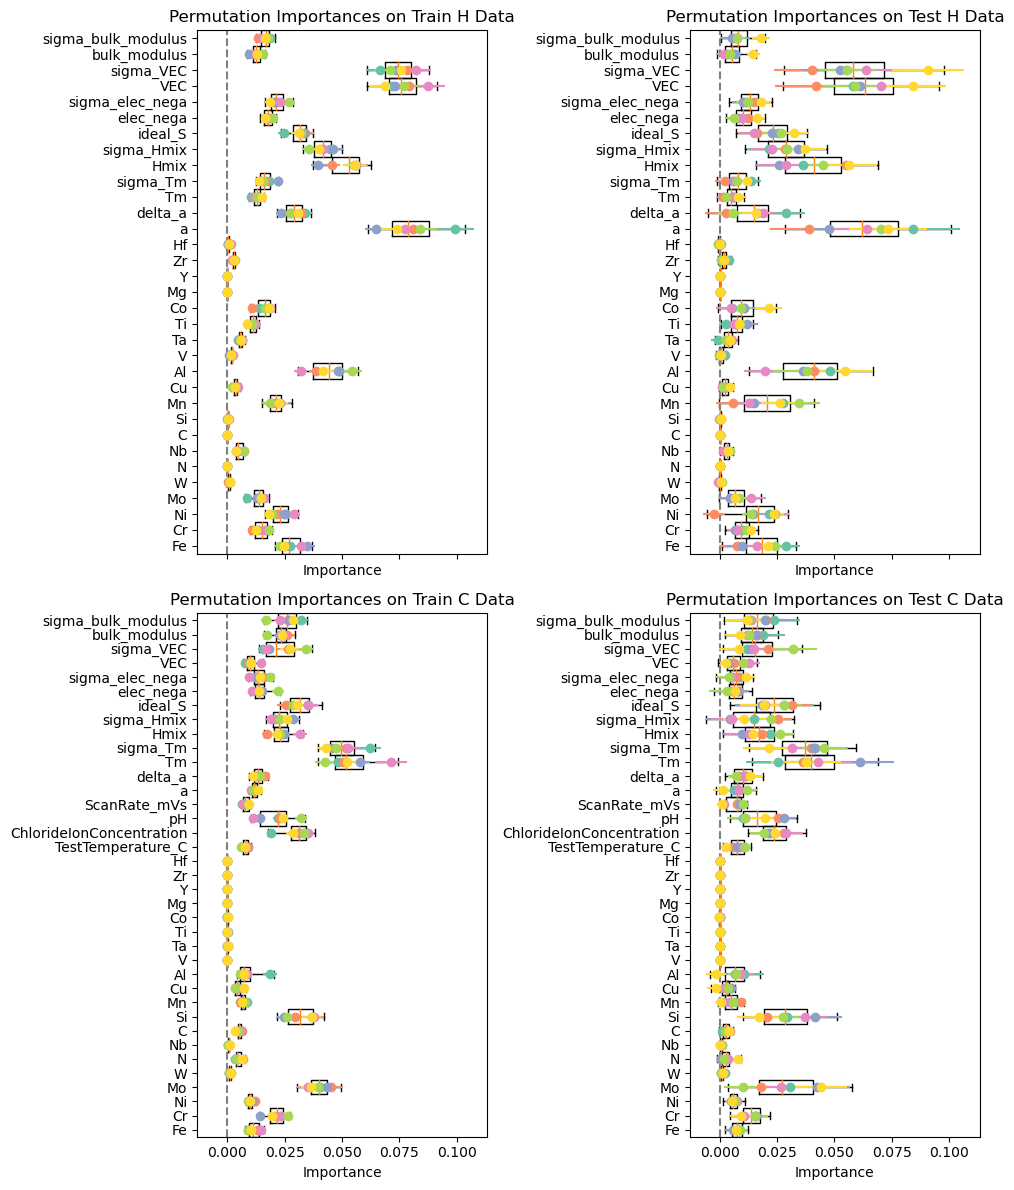

In [146]:
fig, axs = plt.subplots(2, 2, figsize=(10, 12), sharex=True)

# create a color palette of 6 colors using seaborn
colors = sns.color_palette("Set2", 6)

# Data for subplots
datasets = [
    (permu_importances_train_H, 'Train H'),
    (permu_importances_test_H, 'Test H'),
    (permu_importances_train_C, 'Train C'),
    (permu_importances_test_C, 'Test C')
]

feature_names_list = [
    df_H_compo.columns.append(df_H_specific_features.columns).tolist(),
    df_H_compo.columns.append(df_H_specific_features.columns).tolist(),
    df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist(),
    df_C_compo.columns.append(df_C_specific_testing.columns).append(df_C_specific_features.columns).tolist()
]

# Create each subplot
for ax, (permu_importances, data_label), feature_names in zip(axs.ravel(), datasets, feature_names_list):
    
    importances_df_Kfold = pd.DataFrame()

    for i in range(0, 6):
        importances_df = pd.DataFrame(permu_importances[i].importances.T, columns=feature_names)
        # display(importances_df)
        
        importances_df_Kfold = pd.concat([importances_df_Kfold, importances_df], axis=0)

        means = importances_df.mean()
        errors = importances_df.std()
        for j, mean_val in enumerate(means):
            ax.errorbar(mean_val, j, xerr=errors[j], marker='o', color=colors[i], zorder=2)
    
    # print(importances_df_Kfold.shape)
    
    # now overlap the boxplot from the importances_df_Kfold 
    ax.boxplot(importances_df_Kfold, vert=False, whis=[5, 95], positions=range(len(importances_df_Kfold.columns)), showfliers=False, widths=1, zorder=1)
    ax.axvline(x=0, linestyle='--', color='grey', zorder=1)
    ax.set_yticks(range(len(importances_df_Kfold.columns)))
    ax.set_yticklabels(importances_df_Kfold.columns)
    ax.set_xlabel('Importance')
    ax.set_title(f'Permutation Importances on {data_label} Data')

plt.tight_layout()
plt.show()


### Feature Importance Calculation by Random Forest

determines and visualizes the importance of features for two datasets (hardness and corrosion), using data from several models, by creating a bar plot with error bars that represent the standard deviation of the calculated importance values.


In [155]:
# Initialize importance dataframes
df_importance_H, df_importance_C = pd.DataFrame(
    columns=feature_names_H), pd.DataFrame(columns=feature_names_C)

df_permu_importance_train_H, df_permu_importance_train_C = pd.DataFrame(
    columns=feature_names_H), pd.DataFrame(columns=feature_names_C)

# Populate importance dataframes
for i, (model_H, model_C, permu_importance_train_H, permu_importance_train_C) in enumerate(zip(models_H, models_C, permu_importances_train_H, permu_importances_train_C)):

    df_importance_H.loc[i] = model_H.feature_importances_
    df_importance_C.loc[i] = model_C.feature_importances_

    # print(permu_importance_train_H)

    df_permu_importance_train_H = pd.concat([df_permu_importance_train_H, pd.DataFrame(
        permu_importance_train_H.importances_mean.reshape(1, -1), columns=feature_names_H)])
    df_permu_importance_train_C = pd.concat([df_permu_importance_train_C, pd.DataFrame(
        permu_importance_train_C.importances_mean.reshape(1, -1), columns=feature_names_C)])

# display(df_permu_importance_train_H.shape)
# display(df_permu_importance_train_C.shape)

# Calculate mean and std for each feature importance
df_importance_H.loc['mean'], df_importance_H.loc['std'] = df_importance_H.mean(
), df_importance_H.std()
df_importance_C.loc['mean'], df_importance_C.loc['std'] = df_importance_C.mean(
), df_importance_C.std()
df_permu_importance_train_H.loc['mean'], df_permu_importance_train_H.loc['std'] = df_permu_importance_train_H.mean(
), df_permu_importance_train_H.std()
df_permu_importance_train_C.loc['mean'], df_permu_importance_train_C.loc['std'] = df_permu_importance_train_C.mean(
), df_permu_importance_train_C.std()

# Select specific features
df_importance_eng_H = df_importance_H[df_H_specific_features.columns]
df_importance_eng_C = df_importance_C[df_C_specific_features.columns]
df_permu_importance_train_eng_H = df_permu_importance_train_H[df_H_specific_features.columns]
df_permu_importance_train_eng_C = df_permu_importance_train_C[df_C_specific_features.columns]

Visualizes the feature importances derived from tree-based models for 'Hardness' and 'Corrosion' properties, using bar plots with error bars, to facilitate the comparison of feature relevance between the two models.


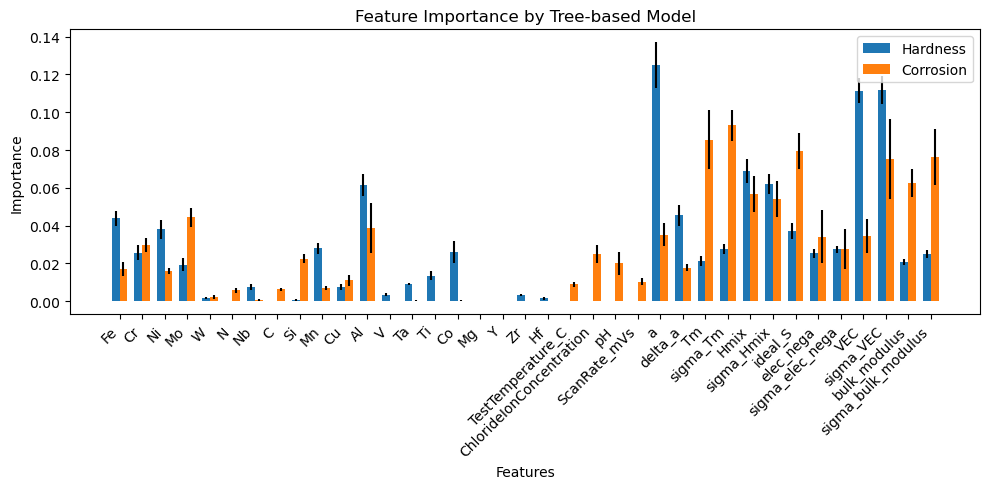

In [156]:
# Plot feature importances from tree-based models

# Synchronize feature names with importance data
df_importance_H_full = pd.DataFrame(columns=feature_names_C)
df_importance_H_full = pd.concat([df_importance_H_full, df_importance_H], axis=0)
df_importance_H_full.index = df_importance_H.index

# Prepare plot
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_H_full.columns))

# Data and labels
data = [(df_importance_H_full, 'Hardness'), (df_importance_C, 'Corrosion')]

# Plot data with error bars
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width, df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Label and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by Tree-based Model')

# Set x-axis labels with correct rotation
ax.set_xticks(index)
ax.set_xticklabels(df_importance_H_full.columns, rotation=45, ha='right')

# Add legend
ax.legend()

# Tight layout and display
fig.tight_layout()
plt.show()


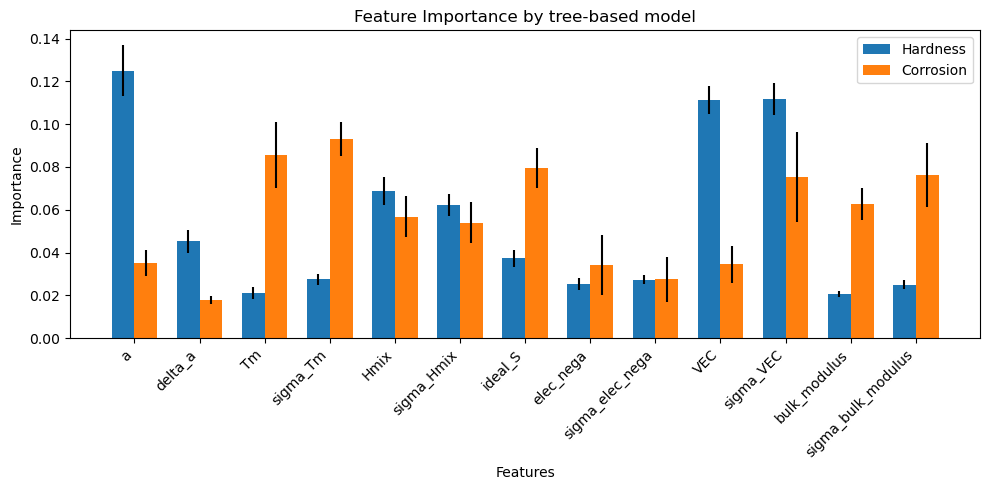

In [157]:
# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_importance_eng_H.columns))

# Define data and labels
data = [(df_importance_eng_H, 'Hardness'),
        (df_importance_eng_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by tree-based model')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_importance_eng_H.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

### Permutation Feature Importance


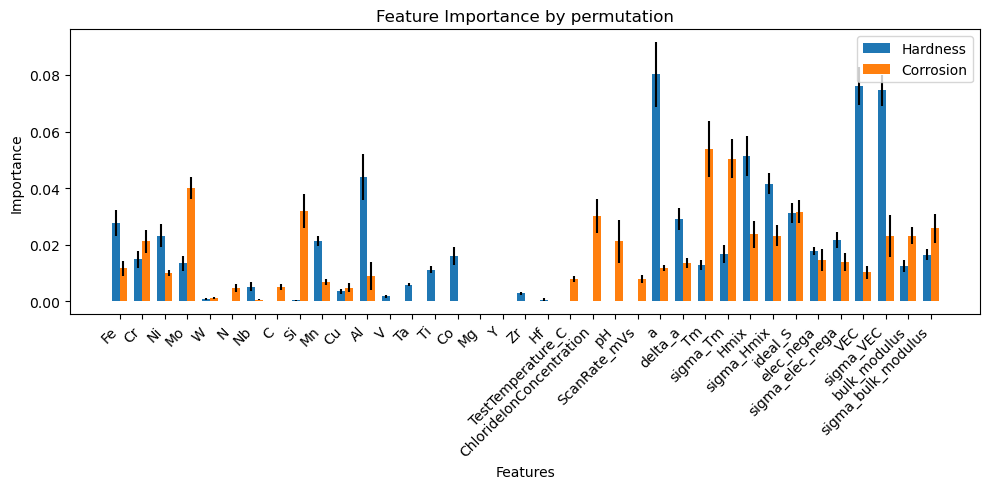

In [158]:
# Plot permutation feature importances

# match the feature importance with the feature names
df_permu_importance_train_H_full = pd.DataFrame(columns=feature_names_C)
df_permu_importance_train_H_full = pd.concat(
    [df_permu_importance_train_H_full, df_permu_importance_train_H], axis=0)
df_permu_importance_train_H_full.index = df_permu_importance_train_H.index

# display(df_permu_importance_train_H_full)

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_H_full.columns))

# Define data and labels
data = [(df_permu_importance_train_H_full, 'Hardness'),
        (df_permu_importance_train_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_H_full.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

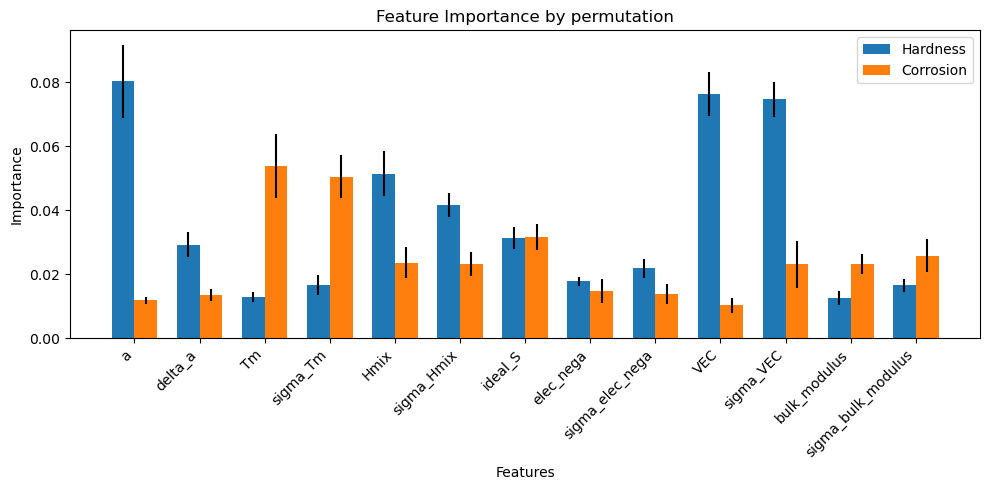

In [159]:
# Plot permutation feature importances
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.35
index = np.arange(len(df_permu_importance_train_eng_H.columns))

# Define data and labels
data = [(df_permu_importance_train_eng_H, 'Hardness'),
        (df_permu_importance_train_eng_C, 'Corrosion')]

# Add bars for each dataset
for i, (df, label) in enumerate(data):
    ax.bar(index + (i-0.5)*bar_width,
           df.loc['mean'], bar_width, yerr=df.loc['std'], label=label)

# Add labels and title
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation')
ax.set_xticks(index)
# set x-axis label rotation and alignment
ax.set_xticklabels(df_permu_importance_train_eng_H.columns, rotation=45, ha='right')
ax.legend()

# Display plot
fig.tight_layout()
plt.show()

In [161]:
# Select top N features based on mean importance for both models
N = 8
top_features_H = df_permu_importance_train_eng_H.loc['mean'].nlargest(
    N).index.tolist()
top_features_C = df_permu_importance_train_eng_C.loc['mean'].nlargest(
    N).index.tolist()

# Find common features
common_features = list(set(top_features_H) & set(top_features_C))

print(f"Top {N} features for 'H': {top_features_H}")
print(f"Top {N} features for 'C': {top_features_C}")
print(f"Common features: {common_features}")

Top 8 features for 'H': ['a', 'VEC', 'sigma_VEC', 'Hmix', 'sigma_Hmix', 'ideal_S', 'delta_a', 'sigma_elec_nega']
Top 8 features for 'C': ['Tm', 'sigma_Tm', 'ideal_S', 'sigma_bulk_modulus', 'Hmix', 'sigma_Hmix', 'bulk_modulus', 'sigma_VEC']
Common features: ['sigma_VEC', 'Hmix', 'ideal_S', 'sigma_Hmix']


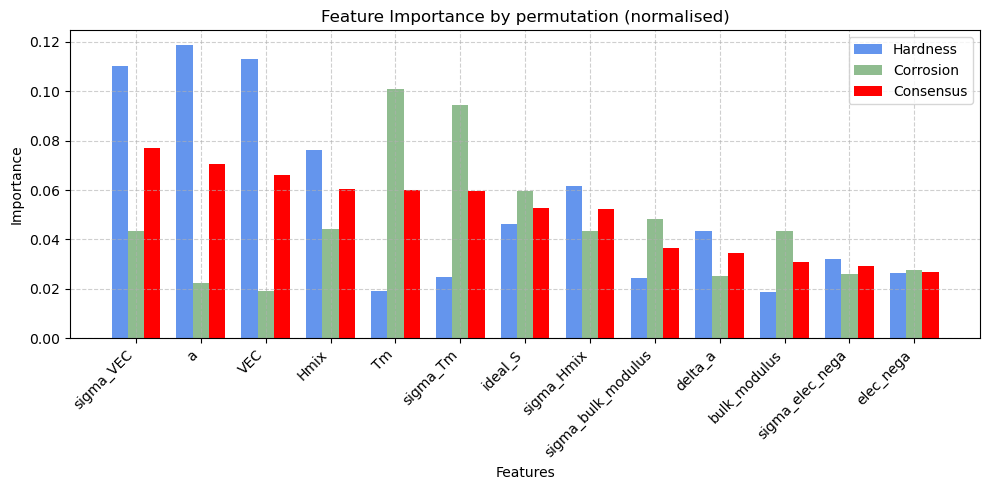

In [162]:
# Start by combining the mean importance data from both models into a single DataFrame
df_permu_importance_train_combined = pd.DataFrame(
    index=['mean_H', 'mean_C'], columns=feature_names_C)

# Assign mean importances to the DataFrame, filling NA values with zero
df_permu_importance_train_combined.loc['mean_H'] = df_permu_importance_train_H_full.loc['mean'].fillna(
    0)
df_permu_importance_train_combined.loc['mean_C'] = df_permu_importance_train_C.loc['mean'].fillna(
    0)

# Normalize the importance scores so that the total sum for each model is 1
df_permu_importance_train_combined.loc['mean_H'] /= df_permu_importance_train_combined.loc['mean_H'].sum()
df_permu_importance_train_combined.loc['mean_C'] /= df_permu_importance_train_combined.loc['mean_C'].sum()

# Create a 'consensus' score, which is the average of the importance scores from the two models
df_permu_importance_train_combined.loc['consensus_score'] = (
    df_permu_importance_train_combined.loc['mean_H'] + df_permu_importance_train_combined.loc['mean_C']) / 2

# Reduce the DataFrame to only the features used in model H
df_permu_importance_train_eng_combined = df_permu_importance_train_combined[df_H_specific_features.columns]

# Sort the features according to the consensus score
df_permu_importance_train_eng_combined_sorted = df_permu_importance_train_eng_combined.sort_values(
    'consensus_score', ascending=False, axis=1)

# Now, let's visualize the sorted feature importances

# Define the figure and the axes
fig, ax = plt.subplots(figsize=(10, 5))

# Set the bar width and calculate the positions of the bars
bar_width = 0.25
index = np.arange(len(df_permu_importance_train_eng_combined_sorted.columns))

# Prepare the data for plotting, along with labels and colors
data = [(df_permu_importance_train_eng_combined_sorted.loc['mean_H'], 'Hardness', 'cornflowerblue'),
        (df_permu_importance_train_eng_combined_sorted.loc['mean_C'], 'Corrosion', 'darkseagreen'),
        (df_permu_importance_train_eng_combined_sorted.loc['consensus_score'], 'Consensus', 'red')]

# Plot each data series as a bar plot
for i, (df, label, color) in enumerate(data):
    ax.bar(index + i*bar_width, df, bar_width, label=label, color=color)

# Set the labels and title for the plot
ax.set_ylabel('Importance')
ax.set_xlabel('Features')
ax.set_title('Feature Importance by permutation (normalised)')

# Add gridlines to make the plot easier to read
ax.grid(True, linestyle='--', alpha=0.6)

# Set up the x-axis labels and ensure they're readable
ax.set_xticks(index + bar_width)
ax.set_xticklabels(
    df_permu_importance_train_eng_combined_sorted.columns, rotation=45, ha='right')

# Position the legend in a good spot
ax.legend(loc='upper right')

# Make sure everything fits and then show the plot
fig.tight_layout()
plt.show()

### need to do something about the correlation of features


### Recursive Feature Elimination (RFE) - a customised version


In [ ]:
# from sklearn.feature_selection import RFE

# # Let's say these are your full features and you have a list defining the group of features
# # you're interested in, like this:

# all_features_C = np.array(df_C_compo.columns.to_list(
# ) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())  # all features
# # the specific group of features
# group_features_C = np.array(df_C_specific_features.columns.to_list())

# # Get the indices of the group features in the full feature list
# group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]

# # Now extract the subset of X corresponding to group features
# X_C_norm_subset = X_C_norm[:, group_indices_C]

# # Now you can run RFE or any other feature selection method on this subset
# rfe_C = RFE(estimator=forestmodel_C, n_features_to_select=5)
# rfe_C = rfe_C.fit(X_C_norm_subset, C2_norm.ravel())
# X_C_norm_subset_rfe = rfe_C.transform(X_C_norm_subset)

# # Get a mask, or integer index, of the features selected
# selected_features_C = rfe_C.support_

# # Get a list of the feature names selected
# selected_feature_names = group_features_C[selected_features_C]
# print(selected_feature_names)

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE
# import numpy as np

# # Assuming X_train is your feature matrix and y_train are your labels
# # always_include is a list of indices for the features you always want to include

# # replace these with the indices of your features
# always_include_indices = [0, 2, 5]
# include_X_train = X_train[:, always_include_indices]

# # Remaining features for RFE
# rfe_indices = [idx for idx in range(
#     X_train.shape[1]) if idx not in always_include_indices]
# rfe_X_train = X_train[:, rfe_indices]

# # Set up a classifier to use with RFE
# clf = RandomForestClassifier(n_estimators=100)

# # Perform RFE on remaining features
# selector = RFE(clf, n_features_to_select=10, step=1)  # choose your parameters
# selector = selector.fit(rfe_X_train, y_train)

# # Now, we join the always included features with the selected features from RFE
# mask = selector.support_
# selected_rfe_indices = np.array(rfe_indices)[mask]
# selected_indices = np.concatenate(
#     [always_include_indices, selected_rfe_indices])

# # Now you can fit your final model on the selected features
# final_X_train = X_train[:, selected_indices]
# final_clf = RandomForestClassifier(n_estimators=100)
# final_clf.fit(final_X_train, y_train)

### first let's use an example to understand how the RFE works


Selected features: ['C' 'D' 'E' 'F']


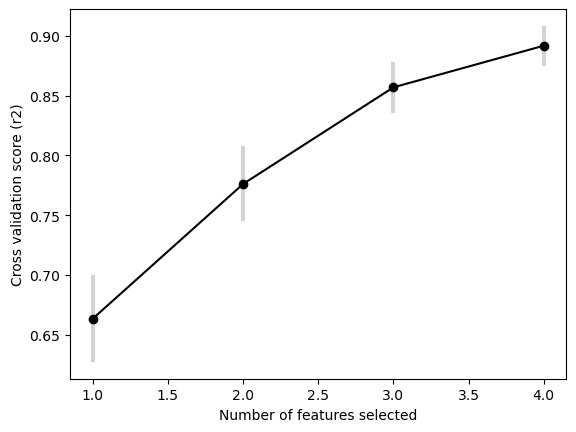

In [163]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate a dummy dataset
X, y = make_regression(n_samples=1000, n_features=6,
                       noise=0.1, random_state=42)
df = pd.DataFrame(X, columns=['A', 'B', 'C', 'D', 'E', 'F'])
df['target'] = y

# Define the fixed features and the features to be eliminated
fixed_features = ['A', 'B']
elimination_features = ['C', 'D', 'E', 'F']

# Define a pipeline for the elimination features
elimination_pipeline = Pipeline(steps=[
    ('scale', StandardScaler()),
    ('rfecv', RFECV(estimator=LinearRegression(), cv=5, scoring='r2'))
])

# Define a preprocessor that applies the elimination pipeline to the elimination features,
# and applies scaling to the fixed features
preprocessor = ColumnTransformer(transformers=[
    ('elim', elimination_pipeline, elimination_features),
    ('fix', StandardScaler(), fixed_features)
])

# Define the final pipeline that includes preprocessing and model training
pipeline = Pipeline(steps=[
    ('pre', preprocessor),
    ('reg', LinearRegression())
])

# Fit the pipeline to the all data
X_all = df[fixed_features + elimination_features]
y_all = df['target']

pipeline.fit(X_all, y_all)

# Access the selected features
selected_features_mask = pipeline.named_steps['pre'].transformers_[
    0][1].named_steps['rfecv'].support_
print(
    f'Selected features: {np.array(elimination_features)[selected_features_mask]}')

# Plot the R^2 score as a function of the number of selected features
num_features = range(1, len(pipeline.named_steps['pre'].transformers_[
                     0][1].named_steps['rfecv'].cv_results_['mean_test_score']) + 1)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.errorbar(num_features,
             pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['mean_test_score'],
             yerr=pipeline.named_steps['pre'].transformers_[
                 0][1].named_steps['rfecv'].cv_results_['std_test_score'],
             fmt='o-', color='black', ecolor='lightgray', elinewidth=3, capsize=0)
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Use the same features and subset
all_features_C = np.array(df_C_compo.columns.to_list(
) + df_C_specific_testing.columns.to_list() + df_C_specific_features.columns.to_list())
group_features_C = np.array(df_C_specific_features.columns.to_list())

group_indices_C = np.where(np.isin(all_features_C, group_features_C))[0]
X_C_norm_subset = X_C_norm[:, group_indices_C]

# Create the RFECV object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv_C = RFECV(estimator=forestmodel_C, step=1, cv=KFold(6),
                scoring='neg_mean_squared_error')

rfecv_C.fit(X_C_norm_subset, C2_norm.ravel())

print("Optimal number of features : %d" % rfecv_C.n_features_)

# Get a mask, or integer index, of the features selected
selected_features_C = rfecv_C.support_

# Get a list of the feature names selected
selected_feature_names = group_features_C[selected_features_C]
print(selected_feature_names)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (neg mean squared error)")
plt.plot(range(1, len(rfecv_C.grid_scores_) + 1), rfecv_C.grid_scores_)
plt.show()

>2 0.715 (0.044)
>3 0.820 (0.034)
>4 0.876 (0.032)
>5 0.890 (0.034)
>6 0.884 (0.028)
>7 0.886 (0.028)
>8 0.889 (0.027)
>9 0.885 (0.025)


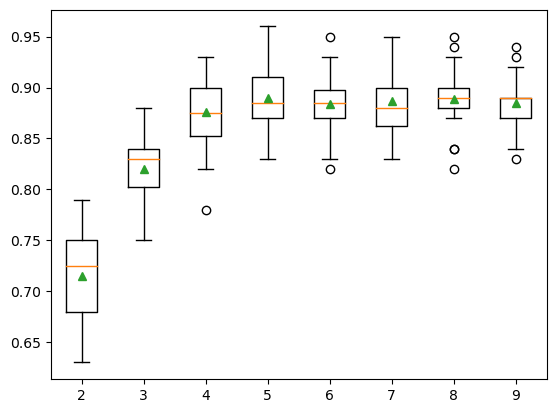

In [164]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset


def get_dataset():
    X, y = make_classification(
        n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X, y

# get a list of models to evaluate


def get_models():
    models = dict()
    for i in range(2, 10):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
    return models

# evaluate a give model using cross-validation


def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()